In [1]:
import requests
from bs4 import BeautifulSoup
import urllib
import re
from urlparse import urljoin
import pandas as pd
import html5lib
from pprint import pprint as pp

Good Resource for Beautiful soup: https://www.crummy.com/software/BeautifulSoup/bs4/doc/

In [2]:
base = 'http://isa.epfl.ch/imoniteur_ISAP/%21gedpublicreports.htm?ww_i_reportmodel=133685247'
r = requests.get(base)
soup = BeautifulSoup(r.text, 'html.parser')
frames = soup.findAll('frame')
for frame in frames:
    if(frame.attrs['name']=="toc"):
        href = urljoin(base,frame.attrs['src'])
        response = urllib.urlopen(href).read() 
        soup = BeautifulSoup(response, 'html.parser')
        
# Extract the name of parameters
tableFormat = soup.find("table", {"id": "format"})
tableFiltre = soup.find("table", {"id": "filtre"})

parameters = []

parameters.append(("ww_x_GPS","-1")) # need to find a way to extract this from the code
parameters.append(('ww_b_list','1'))
parameters.append(('ww_i_reportModel','133685247'))
# Get input value for format which text is html or excel hardcoded 
DATA_FORMAT = "html"
inputs = tableFormat.findAll("input")
for inp in inputs:
    if inp.text == DATA_FORMAT:
        parameters.append((inp.attrs['name'],inp.attrs['value']))
        #print inp.attrs['value']
        
resultsSelection = soup.find("td")
for selection in resultsSelection: 
    if selection.text == "Tous":
        parameters.append((selection.attrs['name'],""))
 
# Extract the name of parameters in tableFiltre
selects = tableFiltre.findAll('select')
for select in selects: 
    parameters.append((select.attrs['name'],""))
parameters

[('ww_x_GPS', '-1'),
 ('ww_b_list', '1'),
 ('ww_i_reportModel', '133685247'),
 (u'ww_i_reportModelXsl', u'133685270'),
 (u'ww_x_UNITE_ACAD', ''),
 (u'ww_x_PERIODE_ACAD', ''),
 (u'ww_x_PERIODE_PEDAGO', ''),
 (u'ww_x_HIVERETE', '')]

In [3]:
UNITE_ACAD = 'Informatique'
PERIODE_ACAD = '2016-2017'
PERIODE_PEDAGO = 'Bachelor semestre 1'

options = tableFiltre.findAll('option')

# Get input value for UNITE_ACAD which text is Informatique or excel hardcoded 
for option in options:
    if option.text == UNITE_ACAD :
        parameters[4] = (parameters[4][0],option.attrs['value'])

# Get input value for PERIODE_ACAD which text is Informatique or excel hardcoded 
    if option.text == PERIODE_ACAD:
        parameters[5] = (parameters[5][0], option.attrs['value'])

# Get input value for PERIODE_PEDAGO which text is Informatique or excel hardcoded 
    if option.text == PERIODE_PEDAGO:
         parameters[6] = (parameters[6][0], option.attrs['value'])

parameters

[('ww_x_GPS', '-1'),
 ('ww_b_list', '1'),
 ('ww_i_reportModel', '133685247'),
 (u'ww_i_reportModelXsl', u'133685270'),
 (u'ww_x_UNITE_ACAD', u'249847'),
 (u'ww_x_PERIODE_ACAD', u'355925344'),
 (u'ww_x_PERIODE_PEDAGO', u'249108'),
 (u'ww_x_HIVERETE', '')]

In [4]:
url = 'http://isa.epfl.ch/imoniteur_ISAP/!GEDPUBLICREPORTS.html?'
rq = requests.get(url,parameters)
soup = BeautifulSoup(rq.text)
print(soup.prettify())

<html>
 <head>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <link href="gedpublicreports.css?ww_x_path=Gestac.Moniteur.Style" rel="stylesheet" type="text/css"/>
 </head>
 <body alink="#666666" bgcolor="#ffffff" link="#666666" marginheight="0" marginwidth="5" vlink="#666666">
  <fieldset style="text-align:right; width:40%; position:relative; margin-right: 10px;float:right; border: 0; padding: 0 0 8px 0;">
   <a href="!GEDREPORTS.html?ww_x_GPS=-1&amp;ww_b_list=1&amp;ww_i_reportModel=133685247&amp;ww_i_reportModelXsl=133685270&amp;ww_x_UNITE_ACAD=249847&amp;ww_x_PERIODE_ACAD=355925344&amp;ww_x_PERIODE_PEDAGO=249108&amp;ww_x_HIVERETE=" style="color:#990033;">
    Identification pour accéder aux e-mails
    <br/>
    Login to access email adresses
   </a>
  </fieldset>
  <script>
   function mailList(x) {
   var vtop = (screen.height-200)/2;
   var vleft=(screen.width-600)/2;
   var w=open("", "emaillist", "Scrollbars=1,resizable=1,width=600,height=200,top="+vtop

/home/meryem/miniconda2/lib/python2.7/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 162 of the file /home/meryem/miniconda2/lib/python2.7/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


In [5]:
table = soup.find('table')
dataframe = pd.read_html(rq.url)
dataframe = dataframe[0]
dataframe.columns = dataframe.ix[1]
dataframe = dataframe.ix[2:]
dataframe.columns

Index([            u'Civilité',           u'Nom Prénom',
       u'Orientation Bachelor',   u'Orientation Master',
             u'Spécialisation',         u'Filière opt.',
                     u'Mineur',               u'Statut',
               u'Type Echange',        u'Ecole Echange',
                  u'No Sciper',                     nan],
      dtype='object', name=1)

In [6]:
period_academique = []
period_academique_options = tableFiltre.find('select', {'name': parameters[5][0]}).find_all('option')
for option in period_academique_options:
    if option.text:
        period_academique.append((option.text,option.attrs['value']))

period_pedagogique = []
period_pedagogique_options = tableFiltre.find('select', {'name': parameters[6][0]}).find_all('option')
for option in period_pedagogique_options:
    if option.text:
        period_pedagogique.append((option.text,option.attrs['value']))

print("Year Options:")
pp(period_academique)

print("Semester Options:")
pp(period_pedagogique)

Year Options:
[(u'2016-2017', u'355925344'),
 (u'2015-2016', u'213638028'),
 (u'2014-2015', u'213637922'),
 (u'2013-2014', u'213637754'),
 (u'2012-2013', u'123456101'),
 (u'2011-2012', u'123455150'),
 (u'2010-2011', u'39486325'),
 (u'2009-2010', u'978195'),
 (u'2008-2009', u'978187'),
 (u'2007-2008', u'978181')]
Semester Options:
[(u'Bachelor semestre 1', u'249108'),
 (u'Bachelor semestre 2', u'249114'),
 (u'Bachelor semestre 3', u'942155'),
 (u'Bachelor semestre 4', u'942163'),
 (u'Bachelor semestre 5', u'942120'),
 (u'Bachelor semestre 5b', u'2226768'),
 (u'Bachelor semestre 6', u'942175'),
 (u'Bachelor semestre 6b', u'2226785'),
 (u'Master semestre 1', u'2230106'),
 (u'Master semestre 2', u'942192'),
 (u'Master semestre 3', u'2230128'),
 (u'Master semestre 4', u'2230140'),
 (u'Mineur semestre 1', u'2335667'),
 (u'Mineur semestre 2', u'2335676'),
 (u'Mise \xe0 niveau', u'2063602308'),
 (u'Projet Master automne', u'249127'),
 (u'Projet Master printemps', u'3781783'),
 (u'Semestre auto

# Exercise 1

Let's extract data for all student registrations starting year 2007 for Bachelor Semester 1 and Bachelor Semester 6

In [7]:
parameters

[('ww_x_GPS', '-1'),
 ('ww_b_list', '1'),
 ('ww_i_reportModel', '133685247'),
 (u'ww_i_reportModelXsl', u'133685270'),
 (u'ww_x_UNITE_ACAD', u'249847'),
 (u'ww_x_PERIODE_ACAD', u'355925344'),
 (u'ww_x_PERIODE_PEDAGO', u'249108'),
 (u'ww_x_HIVERETE', '')]

In [8]:
# Search for Students with Bachelor Semester 1 and Bachelor Semester 6
bigDataFrame = pd.DataFrame()
dataframes = []
url = 'http://isa.epfl.ch/imoniteur_ISAP/!GEDPUBLICREPORTS.html?'
period = [(semester, value) for (semester, value) in period_pedagogique if semester in 
          ['Bachelor semestre 1','Bachelor semestre 5','Bachelor semestre 6']]
for (year,year_value) in period_academique:
    for (semester, semester_value) in period:
        parameters[5] = (parameters[5][0], year_value) # setting periode académique
        parameters[6] = (parameters[6][0], semester_value) # setting periode pédagogique
        rq = requests.get(url,parameters)
        dataframe = pd.read_html(rq.url)
        dataframe = dataframe[0]
        dataframe.columns = dataframe.ix[1]
        dataframe = dataframe.ix[2:]
        dataframe['Year'] = year.split('-')[0]
        dataframe['Semester']= semester
        dataframes.append(dataframe)

bigDataFrame = pd.concat(dataframes)
bigDataFrame = bigDataFrame[[u'Civilité',u'Nom Prénom',u'Statut',u'Year',u'No Sciper',u'Semester']]
bigDataFrame = bigDataFrame.reset_index(drop=True)
# Persist the results 
#bigDataFrame.to_pickle('BachelorFrame.txt')
#df = pd.read_pickle(file_name) #to load data

In [9]:
bigDataFrame

1,Civilité,Nom Prénom,Statut,Year,No Sciper,Semester
0,Monsieur,Abbey Alexandre,Présent,2016,235688,Bachelor semestre 1
1,Monsieur,Ahn Seongho,Présent,2016,274015,Bachelor semestre 1
2,Madame,Alemanno Sara,Présent,2016,268410,Bachelor semestre 1
3,Monsieur,Althaus Luca,Présent,2016,271464,Bachelor semestre 1
4,Monsieur,Assi Karim,Présent,2016,274518,Bachelor semestre 1
5,Monsieur,Badoux Luc-Antoine,Présent,2016,249613,Bachelor semestre 1
6,Monsieur,Bagnoud Jérôme,Présent,2016,262214,Bachelor semestre 1
7,Monsieur,Barbaras Yann Quentin,Présent,2016,262239,Bachelor semestre 1
8,Monsieur,Barras Luca,Présent,2016,257916,Bachelor semestre 1
9,Madame,Barsi Clémence Marie Sabine,Présent,2016,271508,Bachelor semestre 1


In [10]:
bigDataFrame.describe(include='all')

1,Civilité,Nom Prénom,Statut,Year,No Sciper,Semester
count,3273,3273,3273,3273,3273,3273
unique,2,1465,3,10,1465,3
top,Monsieur,Heer Philippe,Présent,2014,192685,Bachelor semestre 1
freq,3011,8,2988,498,8,1719


In [11]:
bigDataFrame[u'No Sciper'].count()

3273

In [12]:
len(bigDataFrame[u'No Sciper'].unique())

1465

In [13]:
distinct_students = bigDataFrame.groupby(u'No Sciper')
distinct_students.describe()

1                 Civilité                                         Nom Prénom  \
No Sciper                                                                       
147008    count          3                                                  3   
          unique         1                                                  1   
          top     Monsieur                                        Good Xavier   
          freq           3                                                  3   
153762    count          2                                                  2   
          unique         1                                                  1   
          top     Monsieur                                       Conus Johann   
          freq           2                                                  2   
154157    count          1                                                  1   
          unique         1                                                  1   
          top       Madame                   Andriambololona Riana Miarantsoa   
          freq           1                                                  1   
159516    count          2                                                  2   
          unique         1                                                  1   
          top     Monsieur                                        Raja Yanick   
          freq           2                                                  2   
159998    count          2                                                  2   
          unique         1                                                  1   
          top       Madame                                        Jesse Julia   
          freq           2                                                  2   
160213    count          1                                                  1   
          unique         1                                                  1   
          top     Monsieur                                 Bécholey Alexandre   
          freq           1                                                  1   
161091    count          2                                                  2   
          unique         1                                                  1   
          top       Madame                                   Grivet Ekaterina   
          freq           2                                                  2   
161127    count          2                                                  2   
          unique         1                                                  1   
...                    ...                                                ...   
275383    top     Monsieur                               Cochard Victor Angel   
          freq           1                                                  1   
275553    count          1                                                  1   
          unique         1                                                  1   
          top     Monsieur                                          Hu Julien   
          freq           1                                                  1   
275608    count          1                                                  1   
          unique         1                                                  1   
          top     Monsieur                                          Boujo Max   
          freq           1                                                  1   
276016    count          1                                                  1   
          unique         1                                                  1   
          top     Monsieur                            Wilders Eric Bruno John   
          freq           1                                                  1   
276323    count          1                                                  1   
          unique         1                                                  1   
          top     Monsieur     

In [14]:
bigDataFrame

1,Civilité,Nom Prénom,Statut,Year,No Sciper,Semester
0,Monsieur,Abbey Alexandre,Présent,2016,235688,Bachelor semestre 1
1,Monsieur,Ahn Seongho,Présent,2016,274015,Bachelor semestre 1
2,Madame,Alemanno Sara,Présent,2016,268410,Bachelor semestre 1
3,Monsieur,Althaus Luca,Présent,2016,271464,Bachelor semestre 1
4,Monsieur,Assi Karim,Présent,2016,274518,Bachelor semestre 1
5,Monsieur,Badoux Luc-Antoine,Présent,2016,249613,Bachelor semestre 1
6,Monsieur,Bagnoud Jérôme,Présent,2016,262214,Bachelor semestre 1
7,Monsieur,Barbaras Yann Quentin,Présent,2016,262239,Bachelor semestre 1
8,Monsieur,Barras Luca,Présent,2016,257916,Bachelor semestre 1
9,Madame,Barsi Clémence Marie Sabine,Présent,2016,271508,Bachelor semestre 1


In [15]:
def start(bigDataFrame):
    year = bigDataFrame.loc[bigDataFrame[u'No Sciper']==sciper].loc[bigDataFrame[u'Semester']=='Bachelor semestre 1'][u'Year']
    if year.any():
        year = int(year.iloc[0])
    else: 
        year = 'NaN'
    return year

def end(bigDataFrame):
    year = bigDataFrame.loc[bigDataFrame[u'No Sciper']==sciper].loc[bigDataFrame[u'Semester']=='Bachelor semestre 6'][u'Year']
    if year.any():
        year = int(year.iloc[-1])
    else: 
        year = 'NaN'
    return year

def duration(start,end):
    if start != 'NaN' and end != 'NaN':
        return (int(end)-int(start)+1)*12
    else: 
        return 'NaN'

df = [[sciper,start(bigDataFrame),end(bigDataFrame),duration(start(bigDataFrame),end(bigDataFrame))] for sciper in bigDataFrame[u'No Sciper'].unique()]   

In [16]:
bachelorStudents = pd.DataFrame(df)
bachelorStudents.columns = [u'No Sciper','Start','End','Duration']
bachelorStudents = bachelorStudents[bachelorStudents['Duration']!='NaN']
#bigDataFrame.loc[bigDataFrame[u'No Sciper']=='251758']
bachelorStudents['Duration']=bachelorStudents['Duration'].astype(int)
bachelorStudents
bachelorStudents.sort_values(by=u'No Sciper',ascending=1)
bachelorStudents['Duration'].mean()

36.18136020151133

In [17]:
# Partition the data between male and female students and compute average for male and female
def gender(sciper):
    return bigDataFrame[bigDataFrame[u'No Sciper']==sciper][u'Civilité'].iloc[0]
df = [[sciper,gender(sciper),start(bigDataFrame),end(bigDataFrame),duration(start(bigDataFrame),end(bigDataFrame))] 
      for sciper in bigDataFrame[u'No Sciper'].unique()]  

genderFrame = pd.DataFrame(df)
genderFrame.columns = [u'No Sciper',u'Gender','Start','End','Duration']
genderFrame = genderFrame[genderFrame['Duration']!='NaN']
genderFrame['Duration']=genderFrame['Duration'].astype(int)
genderFrame.groupby(u'Gender')['Duration'].describe()

Gender         
Madame    count     29.000000
          mean      36.000000
          std        0.000000
          min       36.000000
          25%       36.000000
          50%       36.000000
          75%       36.000000
          max       36.000000
Monsieur  count    368.000000
          mean      36.195652
          std        1.971122
          min       24.000000
          25%       36.000000
          50%       36.000000
          75%       36.000000
          max       48.000000
dtype: float64

In [20]:
import scipy.stats as stats
femaleBachelor = genderFrame[genderFrame['Gender']=='Madame']['Duration']
maleBachelor = genderFrame[genderFrame['Gender']=='Monsieur']['Duration']
stats.ttest_ind(a = femaleBachelor,b = maleBachelor,
                equal_var=False)   # Assume samples have equal variance?

Ttest_indResult(statistic=-1.9041234359346662, pvalue=0.057675902591627554)

# Exercise 2

In [21]:
# Search for Students with Bachelor Semester 1 and Bachelor Semester 6
masterDataFrame = pd.DataFrame()
dataframes = []
url = 'http://isa.epfl.ch/imoniteur_ISAP/!GEDPUBLICREPORTS.html?'
period = [(semester, value) for (semester, value) in period_pedagogique if semester in 
          ['Master semestre 1','Master semestre 2','Master semestre 3','Projet Master automne','Projet Master printemps']]
for (year,year_value) in period_academique:
    for (semester, semester_value) in period:
        #print "year is : "+ str(year) + "semester is : "+semester
        parameters[5] = (parameters[5][0], year_value) # setting periode académique
        parameters[6] = (parameters[6][0], semester_value) # setting periode pédagogique
        rq = requests.get(url,parameters)
        dataframe = pd.read_html(rq.url)
        dataframe = dataframe[0]
        if len(dataframe.index) > 1:
            dataframe.columns = dataframe.ix[1]
            dataframe = dataframe.ix[2:]
            dataframe['Year'] = year.split('-')[0]
            dataframe['Semester']= semester
            dataframes.append(dataframe)

masterDataFrame = pd.concat(dataframes)
masterDataFrame = masterDataFrame[[u'Civilité',u'Nom Prénom',u'Statut',u'Year',u'No Sciper',u'Semester',u'Spécialisation']]
masterDataFrame = masterDataFrame.reset_index(drop=True)

In [83]:
masterDataFrame

1,Civilité,Nom Prénom,Statut,Year,No Sciper,Semester,Spécialisation
0,Monsieur,Adams Marc Alain,Présent,2016,271331,Master semestre 1,NaN
1,Monsieur,Adamsons Valdis,Présent,2016,273101,Master semestre 1,NaN
2,Monsieur,Agapiou Stylianos,Présent,2016,267543,Master semestre 1,NaN
3,Monsieur,Aiulfi Loris Sandro,Présent,2016,202293,Master semestre 1,NaN
4,Monsieur,Alfonso Peterssen Alfonso,Présent,2016,228219,Master semestre 1,Foundations of Software
5,Monsieur,Angerand Grégoire Georges Jacques,Présent,2016,212464,Master semestre 1,NaN
6,Monsieur,Anongba Varela Dario Abougnan,Présent,2016,226371,Master semestre 1,Software Systems
7,Monsieur,Aquil Mohammad Amimul Ihsan,Présent,2016,273107,Master semestre 1,Foundations of Software
8,Monsieur,Bao Junze,Présent,2016,266983,Master semestre 1,NaN
9,Monsieur,Barbera Antonino,Présent,2016,273118,Master semestre 1,NaN


In [22]:
# Search for the largest year and its corresponding semester: 
#     Fall: Master Semester 1 or Master Semester 3
#     Spring: Master Semester 2 
def largest_year(sciper):
    frame = masterDataFrame.loc[masterDataFrame[u'No Sciper']==sciper]
    year = frame[u'Year'].max()
    semester = frame.loc[frame[u'Year'].idxmax()][u'Semester']
    return (year,semester)
# Search for the smallest year and its corresponding semester: 
#     Fall: Master Semester 1 or Master Semester 3
#     Spring: Master Semester 2 
def smallest_year(sciper):
    frame = masterDataFrame.loc[masterDataFrame[u'No Sciper']==sciper]
    year = frame[u'Year'].min()
    semester = frame.loc[frame[u'Year'].idxmin()][u'Semester']
    return (year,semester)

def no_project(sciper):
    frame = masterDataFrame.loc[masterDataFrame[u'No Sciper']==sciper][u'Semester']
    if 'Projet Master printemps' in frame.values:
        return False
    elif 'Projet Master automne' in frame.values:
        return False
    return True

def specialization(sciper):
    return masterDataFrame.loc[masterDataFrame[u'No Sciper']==sciper][u'Spécialisation'].iloc[-1]

def gender(sciper):
    return masterDataFrame.loc[masterDataFrame[u'No Sciper']==sciper][u'Civilité'].iloc[0]

def nom(sciper):
    return masterDataFrame.loc[masterDataFrame[u'No Sciper']==sciper][u'Nom Prénom'].iloc[0]

# Compute duration in months following this formula:
# (largest year - smallest year) * 12 + 6 months (if smallest semester is in Fall) 
# + 6 months (if largest semester is in Spring) 
def duration((start_year,start_sem),(end_year,end_sem)):
    duration = (int(end_year) - int(start_year)) * 12 
    if start_sem in ['Master Semestre 1','Master Semestre 3','Projet Master automne']:
        duration = duration + 6
    if end_sem in  ['Master Semestre 2','Projet Master printemps']:
        duration = duration + 6
    if no_project(sciper) and not_now(end_year,end_sem):   
        duration = duration + 6
    return duration

def not_now(end_year,end_sem):
    if end_year == '2016':
        if end_sem == 'Master Semester 3':
            return False
    return True

df = [[gender(sciper),nom(sciper),sciper,smallest_year(sciper),largest_year(sciper),duration(smallest_year(sciper),largest_year(sciper)),specialization(sciper)] for sciper in masterDataFrame[u'No Sciper'].unique()]   


In [23]:
masterStudents = pd.DataFrame(df)
masterStudents.columns = ['Gender',u'Nom Prénom','Sciper','Start','End','Duration','Specialization']
masterStudents['Duration']=masterStudents['Duration'].astype(int)
masterStudents
masterStudents.sort_values(by=u'Sciper',ascending=1)
# Remove entries where duration strictly less than 18 months since a student needs at least 18 months to finish studies
masterStudents = masterStudents[masterStudents['Duration']>= 18] 
masterStudents['Duration'].describe(include ='all')

count    602.000000
mean      20.521595
std        4.959775
min       18.000000
25%       18.000000
50%       18.000000
75%       18.000000
max       48.000000
Name: Duration, dtype: float64

In [84]:
masterStudents

,Gender,Nom Prénom,Sciper,Start,End,Duration,Specialization
17,Monsieur,Brousse Cyriaque Gilles Guillaume,227209,"(2015, Master semestre 2)","(2016, Master semestre 1)",18,NaN
19,Monsieur,Cartier Alexis Victor Xavier,202973,"(2015, Master semestre 2)","(2016, Master semestre 1)",18,Data Analytics
38,Madame,Duré Laurence,194836,"(2015, Master semestre 1)","(2016, Master semestre 1)",18,NaN
45,Monsieur,Grimault Yannick Erwan,247875,"(2015, Master semestre 2)","(2016, Master semestre 1)",18,NaN
48,Monsieur,Han Chong,254805,"(2015, Master semestre 1)","(2016, Master semestre 1)",18,NaN
54,Monsieur,Huet Joachim,224847,"(2015, Master semestre 2)","(2016, Master semestre 1)",18,NaN
55,Monsieur,Imani Ismail,204869,"(2015, Master semestre 2)","(2016, Master semestre 1)",18,NaN
70,Monsieur,Link Jonathan Stéphane Oskar,201568,"(2015, Master semestre 1)","(2016, Master semestre 1)",18,NaN
72,Monsieur,Loup Vincent,225688,"(2015, Master semestre 2)","(2016, Master semestre 1)",18,NaN
73,Monsieur,Lukas Loris,193051,"(2015, Master semestre 1)","(2016, Master semestre 1)",18,NaN


In [24]:
# Extract all students with a Spécialization (eliminate students without spécialization)
masterStudentsSpe = masterStudents.dropna(axis = 0)

# Compute the average stay per each category of that attribute
masterStudents
masterStudentsSpe.groupby('Specialization')['Duration'].describe(include = 'all')

Specialization                       
Computer Engineering - SP       count    16.000000
                                mean     21.000000
                                std       4.898979
                                min      18.000000
                                25%      18.000000
                                50%      18.000000
                                75%      24.000000
                                max      30.000000
Computer Science Theory         count     1.000000
                                mean     18.000000
                                std            NaN
                                min      18.000000
                                25%      18.000000
                                50%      18.000000
                                75%      18.000000
                                max      18.000000
Data Analytics                  count     5.000000
                                mean     18.000000
                                std       0.

In [87]:
# Categories
ComputerEngineering = masterStudentsSpe[masterStudentsSpe['Specialization']=='Computer Engineering - SP']['Duration']
ComputerScienceTheory = masterStudentsSpe[masterStudentsSpe['Specialization']=='Computer Science Theory']['Duration']
DataAnalytics = masterStudentsSpe[masterStudentsSpe['Specialization']=='Data Analytics']['Duration']
InternetComputing  = masterStudentsSpe[masterStudentsSpe['Specialization']=='Internet computing']['Duration']
ServiceScience = masterStudentsSpe[masterStudentsSpe['Specialization']=='Service science']['Duration']
SignalsImagesInterfaces = masterStudentsSpe[masterStudentsSpe['Specialization']=='Signals, Images and Interfaces']['Duration']
SoftwareSystems = masterStudentsSpe[masterStudentsSpe['Specialization']=='Software Systems']['Duration']
masterStudentsDurations = masterStudents['Duration']
# Compare each specialization with the whole average
stats.ttest_ind(a = ComputerEngineering,b = masterStudentsDurations,
                equal_var=False)   # Assume samples have equal variance?
len(InternetComputing)
len

69

In [26]:
stats.ttest_ind(a = ComputerScienceTheory,b = masterStudentsDurations,
                equal_var=False)   # Assume samples have equal variance?

/home/meryem/miniconda2/lib/python2.7/site-packages/numpy/core/_methods.py:82: RuntimeWarning: Degrees of freedom <= 0 for slice
  warnings.warn("Degrees of freedom <= 0 for slice", RuntimeWarning)


Ttest_indResult(statistic=nan, pvalue=nan)

In [27]:
stats.ttest_ind(a = DataAnalytics,b = masterStudentsDurations,
                equal_var=False)   # Assume samples have equal variance?

Ttest_indResult(statistic=-12.474167300190734, pvalue=6.3769717003631469e-32)

In [28]:
stats.ttest_ind(a = InternetComputing,b = masterStudentsDurations,
                equal_var=False)   # Assume samples have equal variance?

Ttest_indResult(statistic=0.39648270651481932, pvalue=0.69276902674442553)

In [29]:
stats.ttest_ind(a = ServiceScience,b = masterStudentsDurations,
                equal_var=False)   # Assume samples have equal variance?

Ttest_indResult(statistic=1.00242383234066, pvalue=0.42110589797644299)

In [30]:
stats.ttest_ind(a = SignalsImagesInterfaces,b = masterStudentsDurations,
                equal_var=False)   # Assume samples have equal variance?

Ttest_indResult(statistic=1.6883183408503666, pvalue=0.10820216722344358)

In [31]:
stats.ttest_ind(a = SoftwareSystems,b = masterStudentsDurations,
                equal_var=False)   # Assume samples have equal variance?

Ttest_indResult(statistic=-2.96120838354005, pvalue=0.0083223696621918478)

# Exercise 3

In [32]:
# Gender Based Analysis
import scipy.stats as stats
masterStudents.groupby('Gender')['Duration'].describe(include='all')
masterFemales = masterStudents[masterStudents['Gender']=='Madame']['Duration']
masterMales = masterStudents[masterStudents['Gender']=='Monsieur']['Duration']
stats.ttest_ind(a = masterFemales,b = masterMales,
                equal_var=False)   # Assume samples have equal variance?

Ttest_indResult(statistic=-0.066091845385096659, pvalue=0.94742704398913202)

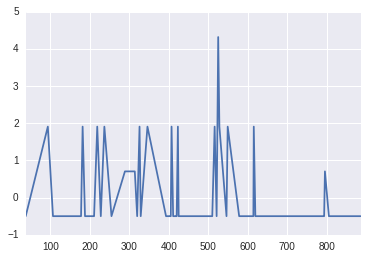

In [88]:
import numpy as np
from scipy.stats import kstest
from scipy.stats import wilcoxon
females = masterStudents[masterStudents['Gender']=='Madame']['Duration']
males = masterStudents[masterStudents['Gender']=='Monsieur']['Duration']
females
kstest(females,'norm')
kstest(males,'norm')
#import matplotlib.pyplot as plt
#females.plot()
#plt.hist(males, bins = 10) # males not a normal distribution
#plt.hist(females) # females not a normal distribution
wilcoxon(females, y=None, zero_method='wilcox', correction=False)

# Data Normalization
#Normalization refers to rescaling real valued numeric attributes into the range 0 and 1.
females_norm = (females - females.mean()) / (females.max() - females.min())

males_norm = (males - males.mean()) / (males.max() - males.min())

#Data Standardization: Standardization refers to shifting the distribution of each attribute 
#to have a mean of zero and a standard deviation of one (unit variance)
# Standardize the data attributes for the Iris dataset.
females_stand = (females_norm - females_norm.mean()) / females_norm.std()
females_stand.describe(include = 'all')

males_stand = (males_norm - males_norm.mean()) / males_norm.std()
males_stand.describe(include = 'all')

stats.ttest_ind(a = females_stand,b = males_stand,
                equal_var=False)   # Assume samples have equal variance?
females_stand.plot()

In [85]:
masterStudents.groupby('Gender')['Duration'].describe(include='all')

Gender         
Madame    count     82.000000
          mean      20.487805
          std        4.984529
          min       18.000000
          25%       18.000000
          50%       18.000000
          75%       18.000000
          max       42.000000
Monsieur  count    520.000000
          mean      20.526923
          std        4.960659
          min       18.000000
          25%       18.000000
          50%       18.000000
          75%       18.000000
          max       48.000000
dtype: float64

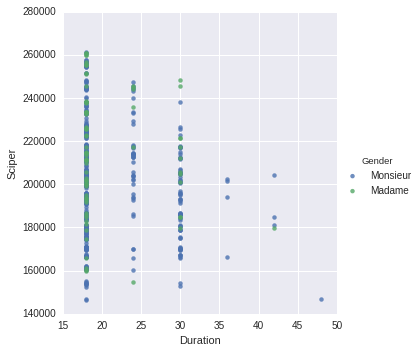

In [35]:
# ScatterPlot
%matplotlib inline
import matplotlib.pylab as plt
import seaborn as sns

gender = ['Madame', 'Monsieur']
colors = {'Madame':'red','Monsieur':'blue'}
#plt.scatter(masterStudents.Duration, masterStudents.Sciper, c = masterStudents['Gender'].apply(lambda x: colors[x]))
sns.lmplot('Duration', , data=masterStudents, hue='Gender', fit_reg=False)
plt.show()